# Pset1

In [44]:
import numpy as np
import time # to see if this is fast or not
import matplotlib.pyplot as plt
import seaborn as sns

learning_rate = 0.05
iterations = 5000


## 1. Implement multivariate linear regression

In [45]:

def mult_linear_regression(X, y, learning_rate=0.01, iterations=1000):
    n, k = X.shape

    # adding in intercept col
    X_b = np.hstack((np.ones((n, 1)), X))  # shape (n, k+1)

    # initialize the betas randomly
    beta = np.random.randn(k + 1)

    # Track loss over iterations
    loss_hist = []

    for i in range(iterations):
        # finding y predictions
        y_pred = np.dot(X_b, beta)

        # updating loss MSE function
        loss = (1 / (2 * n)) * np.sum((y_pred - y) ** 2)
        loss_hist.append(loss)

        # calc gradients for each
        gradients = (1 / n) * np.dot(X_b.T, (y_pred - y))

        # updating betas based on slides from class
        beta = beta - learning_rate * gradients

    return beta, loss_hist


True β: [ 5.   2.5 -1.7]
Estimated β: [ 5.002  2.491 -1.714]
Final loss: 0.122635
Run time: 0.2433 seconds


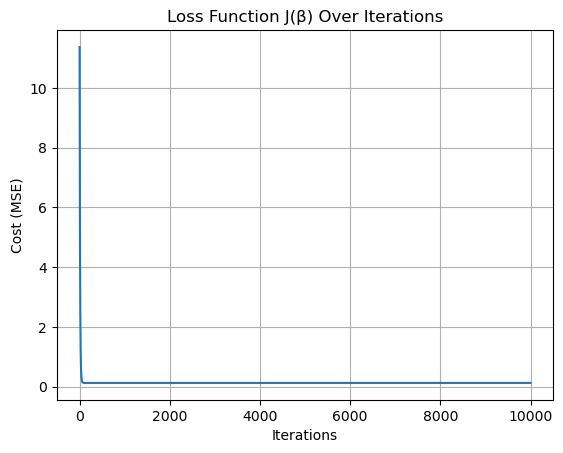

In [46]:
np.random.seed(0)
n, k = 2000, 2   # 2000 samples, 2 features
true_betas = np.array([5, 2.5, -1.7])  # choose from A–E table

# Generate synthetic data
X = np.random.randn(n, k)
noise = np.random.normal(0, 0.5, n)
y = np.dot(np.hstack((np.ones((n,1)), X)), true_betas) + noise

# --- RUN TEST ---
start_time = time.time()
estimated_betas, loss_hist = mult_linear_regression(X, y, learning_rate=0.05, iterations=10000)
end_time = time.time()

# --- RESULTS ---
print("True β:", true_betas)
print("Estimated β:", np.round(estimated_betas, 3))
print("Final loss:", round(loss_hist[-1], 6))
print("Run time:", round(end_time - start_time, 4), "seconds")

# --- PLOT CONVERGENCE ---
plt.plot(loss_hist)
plt.title("Loss Function J(β) Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

## 2. Implement multivariate logistic regression

In [62]:
def mult_logistic_regression(X, y):
    n, k = X.shape

    # adding in intercept col
    X_b = np.hstack((np.ones((n, 1)), X))  # shape (n, k+1)

    # initialize the betas randomly then build from loss function
    beta = np.random.randn(k + 1)
    loss_hist = []

    for i in range(iterations):
        # finding predicted probabilities using sigmoid
        z = np.sum(X_b * beta, axis=1)
        y_pred = 1 / (1 + np.exp(-z))

        # updating loss using cross-entropy function
        eps = 1e-8  # prevents log(0)
        loss = -(1 / n) * np.sum(y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps))
        loss_hist.append(loss)

        # calc gradients for each based on logistic gradient descent
        gradients = (1 / n) * np.sum((y_pred - y).reshape(-1, 1) * X_b, axis=0)

        # updating betas based on slides from class
        beta = beta - learning_rate * gradients

    return beta, loss_hist

## Testing both with random generated numbers as data and seeing speed

True β: [0, 3, -2]

Estimated β: [-0.     2.99  -1.993]
Final Loss: 0.315209
Accuracy: 0.0 %
Runtime: 0.4333 seconds


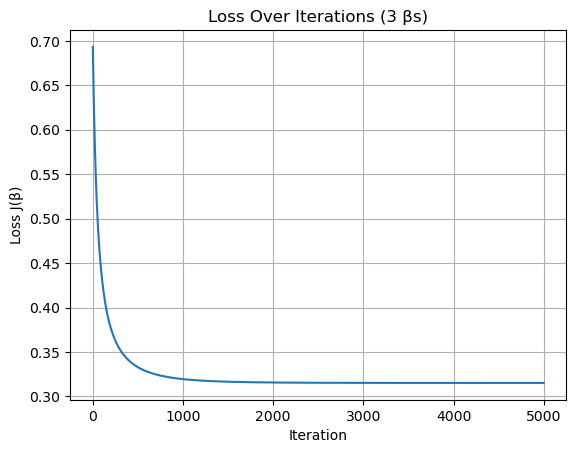

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import time

# -------------------------------
#   Test with 3 Betas (β₀, β₁, β₂)
# -------------------------------

np.random.seed(0)

# True parameters
b0, b1, b2 = 0, 3, -2
print("True β:", [b0, b1, b2])

# Generate synthetic data
n = 1000
X = np.random.randn(2, n).T  # 1000 samples, 2 features
z = b0 + b1*X[:,0] + b2*X[:,1]
pr = 1 / (1 + np.exp(-z))    # true probabilities
y = pr  # stochastic binary labels (0/1)

# Train logistic regression
start = time.time()
beta_hat, loss_hist = mult_logistic_regression(X, y)
end = time.time()

# Predictions
X_b = np.hstack((np.ones((n, 1)), X))
z_hat = np.sum(X_b * beta_hat, axis=1)
y_pred_prob = 1 / (1 + np.exp(-z_hat))
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluate
acc = np.mean(y_pred == y)
print("\nEstimated β:", np.round(beta_hat, 3))
print("Final Loss:", round(loss_hist[-1], 6))
print("Accuracy:", round(acc * 100, 2), "%")
print("Runtime:", round(end - start, 4), "seconds")

# Plot loss
plt.plot(loss_hist)
plt.title("Loss Over Iterations (3 βs)")
plt.xlabel("Iteration")
plt.ylabel("Loss J(β)")
plt.grid(True)
plt.show()


In [1]:
import numpy as np
n = 1000
x = np.random.binomial(3,1/2,size=n)
y = np.random.normal(1+ x,1,n)
print(np.mean(y))

2.4619148821821955


In [4]:
x

array([3, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 3, 2, 2, 1, 1, 2,
       3, 1, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2, 3, 2, 0,
       3, 2, 2, 3, 2, 1, 0, 2, 1, 2, 3, 0, 1, 2, 1, 1, 2, 1, 3, 2, 1, 1,
       0, 0, 1, 1, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 0, 0,
       0, 1, 2, 2, 1, 2, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 2, 2,
       1, 1, 2, 0, 1, 1, 1, 2, 1, 3, 2, 1, 2, 2, 0, 0, 2, 1, 2, 3, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 1, 3, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0,
       2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 1, 3, 1, 1, 0, 2, 2, 1,
       2, 2, 3, 1, 2, 1, 0, 2, 1, 1, 1, 3, 1, 2, 2, 3, 2, 2, 1, 0, 2, 1,
       0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 3, 1, 1, 0, 3, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 3, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 0, 2, 3, 0, 0, 2,
       2, 2, 2, 3, 3, 1, 3, 0, 2, 1, 2, 1, 0, 1, 1,